In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import seaborn as sns
from scipy import stats
import re
from collections import Counter
from sklearn.metrics import r2_score

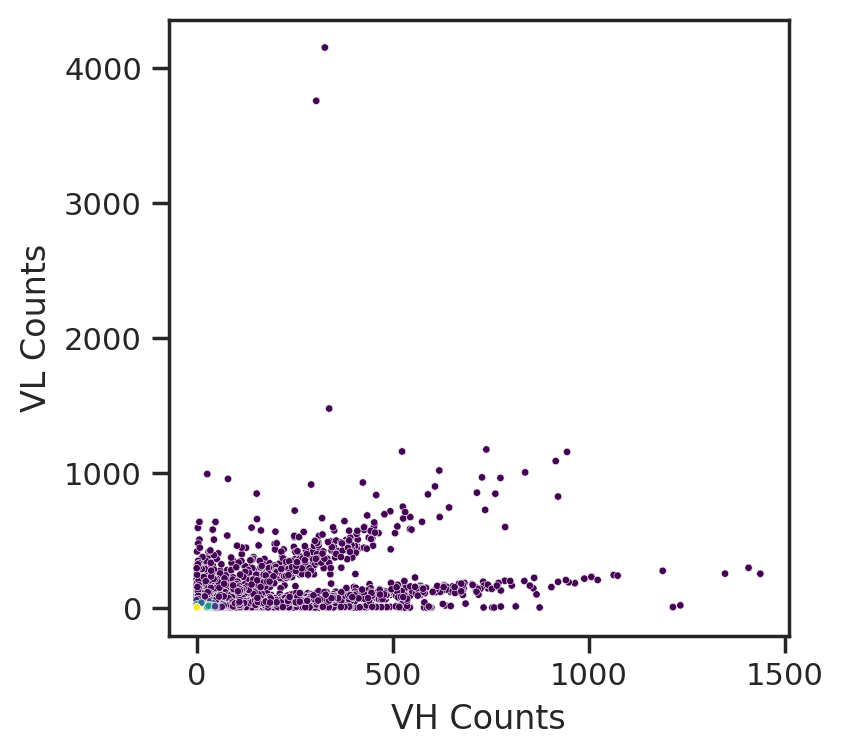

In [3]:
df_lib1 = pd.read_csv(
    "/projects/brpe7306/fab-library-barcoding/maps_B15G10A5/VH2/map.csv"
)
df_lib2 = pd.read_csv(
    "/projects/brpe7306/fab-library-barcoding/maps_B15G10A5/VL1/map.csv"
)


def library_overlap(df1, df2):
    barcodes1 = df1.groupby("Barcode")["Count"].sum()
    barcodes2 = df2.groupby("Barcode")["Count"].sum()
    x, y = [], []
    for barcode in barcodes1.index:
        x.append(barcodes1[barcode])
        try:
            y.append(barcodes2[barcode])
        except:
            y.append(0)
    for barcode in barcodes2.index:
        y.append(barcodes2[barcode])
        try:
            x.append(barcodes1[barcode])
        except:
            x.append(0)
    return x, y


x, y = library_overlap(df_lib1, df_lib2)
custom_params = {
    "axes.spines.right": True,
    "axes.spines.top": True,
    "figure.dpi": 200,
    "savefig.dpi": 600,
    "figure.figsize": (4, 4),
    "font.size": 10,
}
sns.set_theme(rc=custom_params, style="ticks")
fig, ax1 = plt.subplots(1, 1)

values = np.vstack([x, y])
kernel = stats.gaussian_kde(values, bw_method=0.25)(values)
sns.scatterplot(x=x, y=y, c=kernel, cmap="viridis", ax=ax1, s=7)
norm = plt.Normalize(0, 250)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
ax1.set_xlabel("VH Counts")
ax1.set_ylabel("VL Counts")
# ax1.set_xlim((-5, 120))
# ax1.set_ylim((-5, 120))
# ax1.figure.colorbar(sm)
plt.savefig("paired.png", bbox_inches="tight")
plt.show()

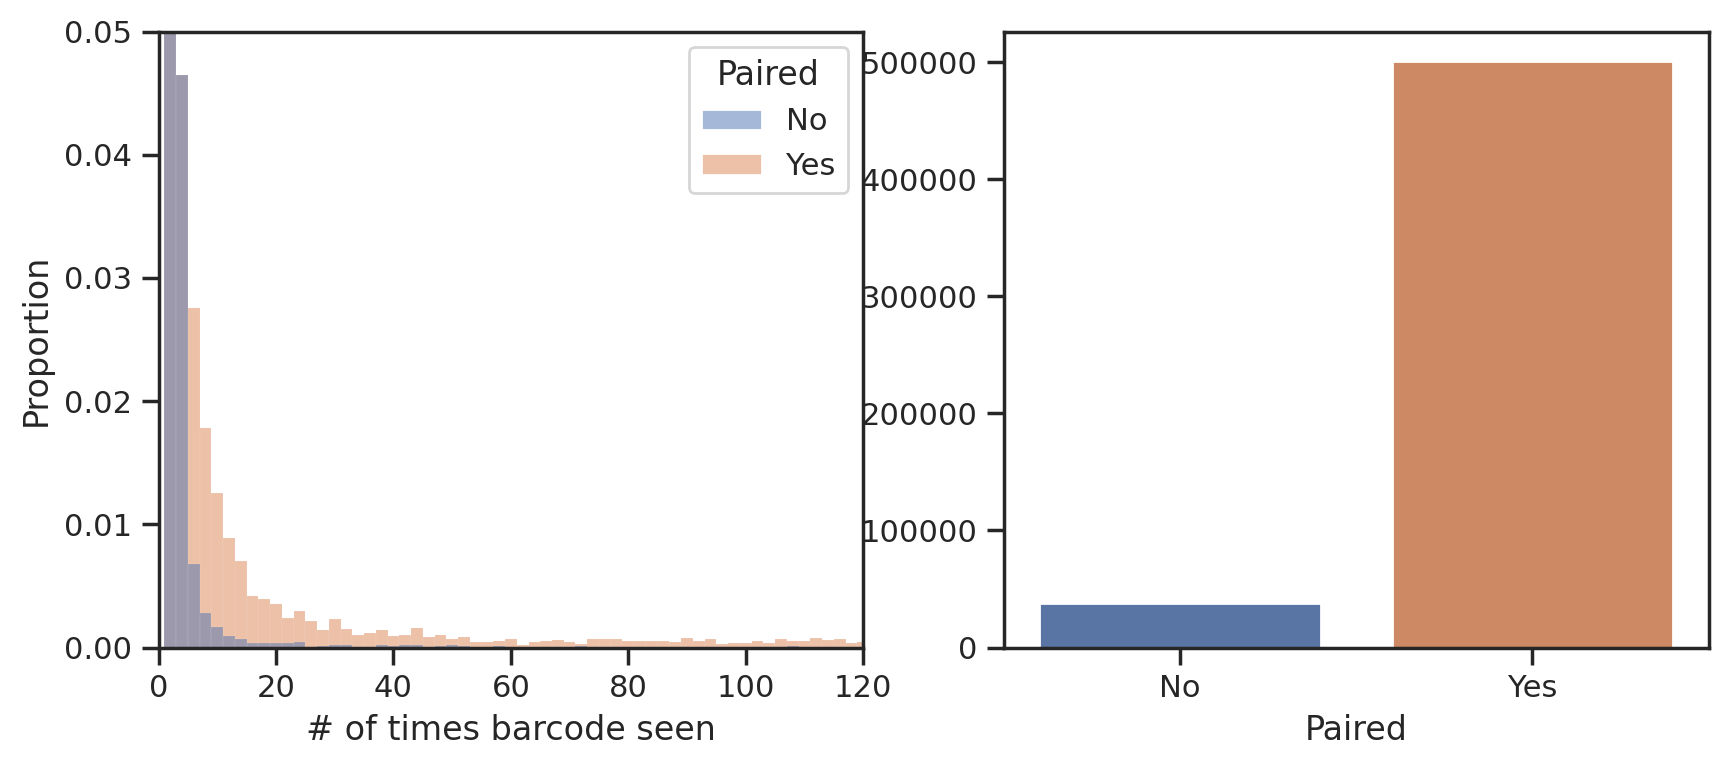

In [8]:
df_lib1 = pd.read_csv("/projects/brpe7306/fab-library-barcoding/maps_final/VH2_VL1_vhvl.csv")
df_lib2 = pd.read_csv("/projects/brpe7306/fab-library-barcoding/maps_final/VH4_VL3_vhvl.csv")
barcodes1 = df_lib1.groupby("Barcode")["Count"].sum()
barcodes2 = df_lib2.groupby("Barcode")["Count"].sum()
paired = []
for barcode in barcodes1.index:
    try:
        _ = barcodes2[barcode]
        paired.append("Yes")
    except:
        paired.append("No")
df_plot = pd.DataFrame({"Count": barcodes1.values, "Paired": paired})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(
    data=df_plot, x="Count", hue="Paired", ax=ax1, binwidth=2, stat="proportion"
)
ax1.set_xlim((0, 120))
ax1.set_ylim((0, 0.05))
paired_seq = df_plot.groupby("Paired")["Count"].sum()
order = ["No", "Yes"]
sns.barplot(x=paired_seq.index, y=paired_seq.values, ax=ax2, order=order)
ax1.set_xlabel("# of times barcode seen")
# ax1.set_ylim((0,1))
plt.show()

Good barcodes: 4820
Unique barcodes: 1700


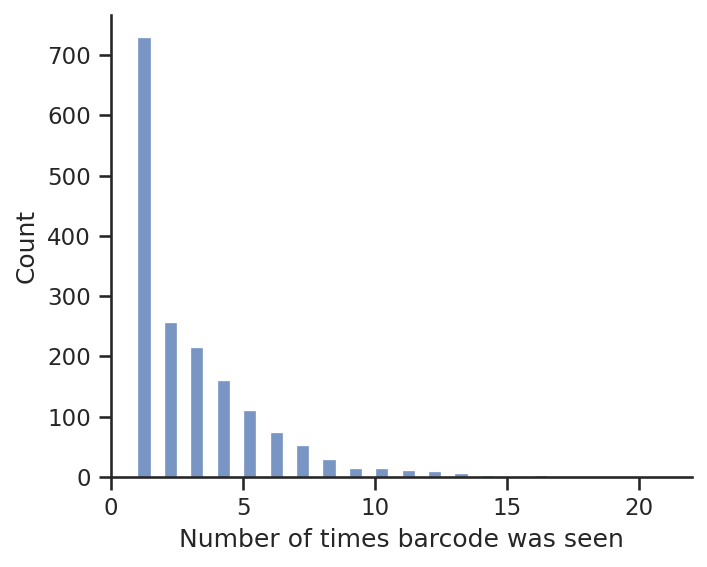

In [6]:
mixed_bases = {
    "R": ["A", "G"],
    "Y": ["C", "T"],
    "M": ["A", "C"],
    "K": ["G", "T"],
    "S": ["C", "G"],
    "W": ["A", "T"],
    "H": ["A", "C", "T"],
    "B": ["C", "G", "T"],
    "V": ["A", "C", "G"],
    "D": ["A", "G", "T"],
    "N": ["A", "C", "G", "T"],
}


def is_good_barcode(read):
    template = "HHDBVHDBVHDBVHDBVHDB"
    is_good = True
    errors = 0
    verbose = False
    assert len(read) == len(template)
    for i, mixed_base in enumerate(template):
        if verbose:
            print(mixed_base, mixed_bases[mixed_base], read[i])
        if read[i] not in mixed_bases[mixed_base]:
            is_good = False
            errors += 1
    return is_good, errors


df = pd.read_csv("/projects/brpe7306/fab-library-barcoding/Output_VH_8/4A8VH/map.csv")
barcodes = df["Barcode"]

good_barcodes, bad_barcodes, num_errors = [], [], []
for barcode in barcodes:
    is_good, errors = is_good_barcode(barcode)
    if is_good:
        good_barcodes.append(barcode)
    else:
        bad_barcodes.append(barcode)
        num_errors.append(errors)

print("Good barcodes:", len(good_barcodes))
unique_barcodes, counts = np.unique(barcodes, return_counts=True)
print("Unique barcodes:", len(counts))
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.dpi": 150,
    "savefig.dpi": 300,
}
sns.set(rc=custom_params, style="ticks")
plt.figure(figsize=(5, 4))
# sns.histplot(num_errors)
# plt.xlabel("Number of barcode errors")
sns.histplot(counts)
plt.xlabel("Number of times barcode was seen")
plt.show()

df = pd.DataFrame({"Barcode": barcodes})
# df.to_csv("barcodes_MBK_1.csv", index=False)
df1 = pd.DataFrame({"Unique Barcode": unique_barcodes, "Count": counts})
# df1.to_csv("unique_MBK_1.csv")

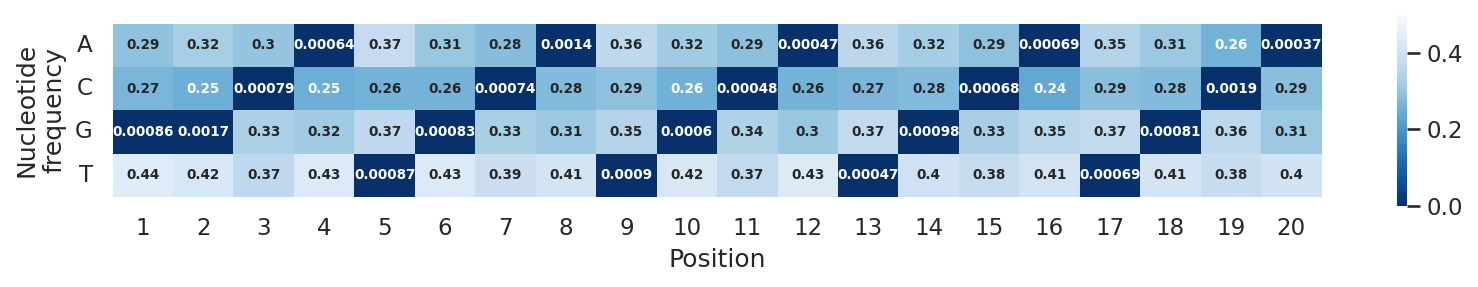

In [10]:
df = pd.read_csv("/projects/brpe7306/fab-library-barcoding/maps_B15G10A5/VH2/map.csv")
heatmap_df = (
    df.Barcode.apply(list)
    .apply(pd.Series)
    .apply(pd.value_counts)
    .apply(lambda x: x.div(x.sum()))
    .fillna(0)
)
heatmap_df = heatmap_df.rename(columns={i: i + 1 for i in range(20)})
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.dpi": 150,
    "savefig.dpi": 300,
}
sns.set_theme(
    rc=custom_params, style="dark", palette=None, font="sans-serif", font_scale=1
)
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 1.5))
cbar_kws = {"orientation": "vertical", "shrink": 1.1, "extendfrac": 0.1}
annot_kws = {"fontsize": 6.5, "weight": "bold"}
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".2g",
    vmin=0,
    vmax=0.5,
    cmap="Blues_r",
    annot_kws=annot_kws,
    cbar_kws=cbar_kws,
)
plt.xlabel("Position")
plt.ylabel("Nucleotide\nfrequency")
plt.yticks(rotation=0)
plt.show()

-0.8744933239507251


/projects/brpe7306/software/anaconda/envsa/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


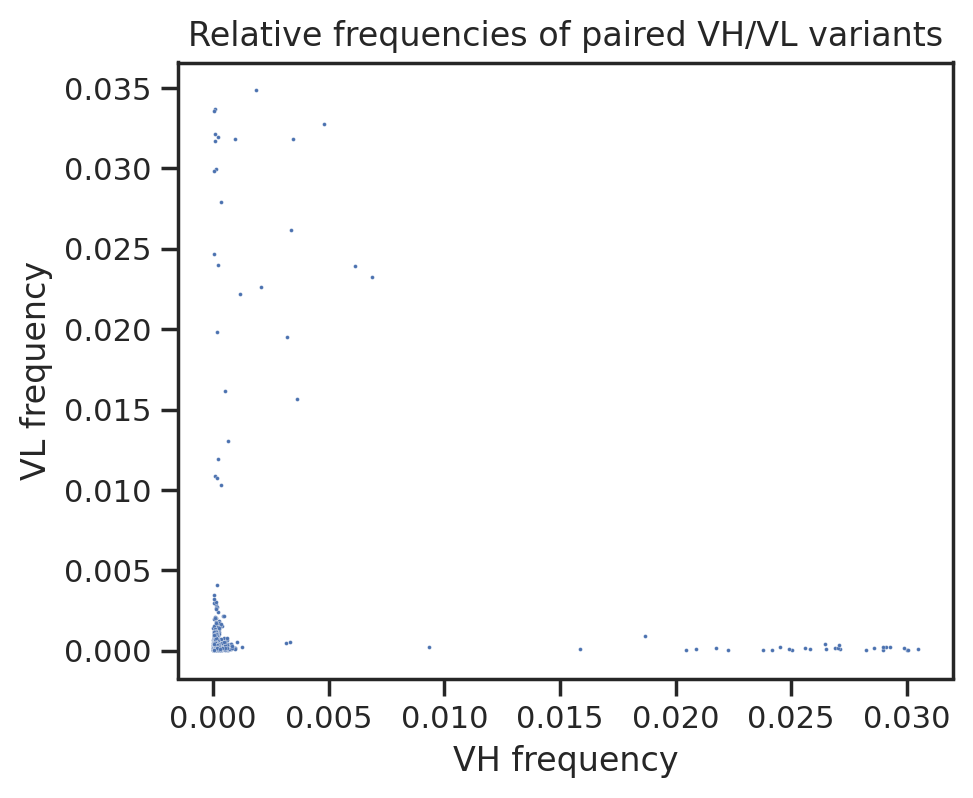

In [12]:
custom_params = {
    "axes.spines.right": True,
    "axes.spines.top": True,
    "figure.dpi": 200,
    "savefig.dpi": 300,
    "figure.figsize": (5, 4),
    "font.size": 5,
}
sns.set_theme(rc=custom_params, style="ticks")
df = pd.read_csv(
    "/projects/brpe7306/fab-library-barcoding/maps_B15G10A5/VH4_VL3_vhvl.csv"
)
vh_f = df["Count_H"] / df["Count_H"].sum()
vl_f = df["Count_L"] / df["Count_L"].sum()
plt.title("Relative frequencies of paired VH/VL variants")
plt.xlabel("VH frequency")
plt.ylabel("VL frequency")
print(r2_score(vh_f, vl_f))
sns.scatterplot(vh_f, vl_f, s=2)
plt.show()

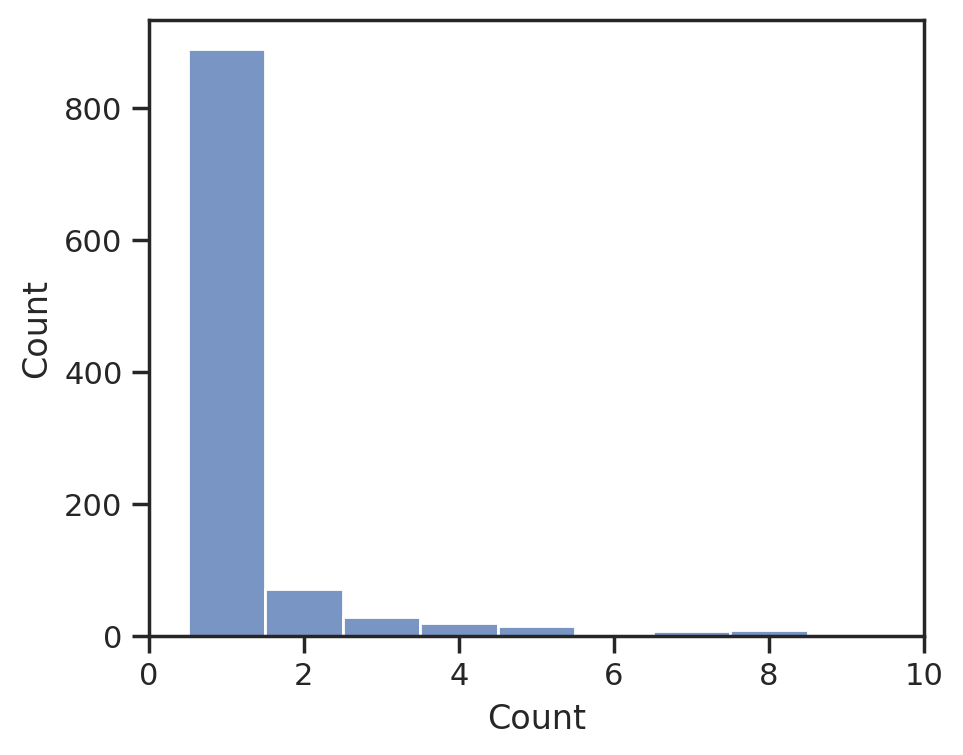

In [46]:
df = pd.read_csv(
    "/projects/brpe7306/fab-library-barcoding/Output_VH_8/4A8VH/map_success.csv"
)
# df = pd.read_csv("/projects/brpe7306/fab-library-barcoding/Output_VH_8/4A8VH/map.csv")
sns.histplot(data=df, x="Count", binwidth=1, discrete=True)
plt.xlim([0, 10])
# sns.histplot(data=df2, x="Count")
plt.show()

AAACCTTTAAATCATTCATT
AAACCTTTACATCATTCATT 1


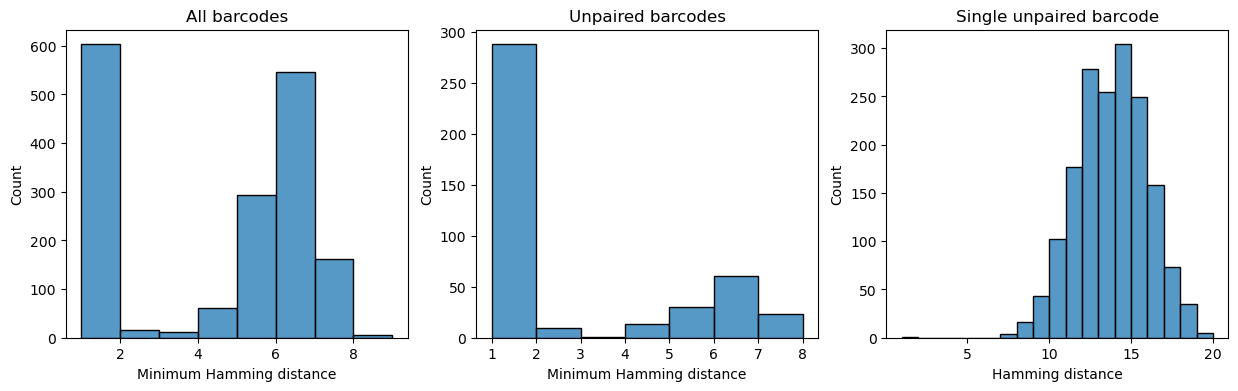

In [13]:
df_lib1 = pd.read_csv(
    "/projects/brpe7306/fab-library-barcoding/Output_VH_8/4A8VH/map.csv"
)
df_lib2 = pd.read_csv(
    "/projects/brpe7306/fab-library-barcoding/Output_VL_7/4A8VL/map.csv"
)
barcodes1 = df_lib1.groupby("Barcode")["Count"].sum()
barcodes2 = df_lib2.groupby("Barcode")["Count"].sum()


def hamming_distance(str1, str2):
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))


# print(hamming_distance("AAAAAAAAAAAA", "AAAAAAAATTTT"))
unpaired, unpaired_hds, all_hds = [], [], []
for barcode in barcodes1.index:
    hamming_distances = [
        hamming_distance(barcode, i) if barcode != i else 20 for i in barcodes2.index
    ]
    all_hds.append(min(hamming_distances))
    try:
        _ = barcodes2[barcode]
    except:
        unpaired.append(barcode)
        unpaired_hds.append(min(hamming_distances))

barcode_index = 0
hamming_distances = [
    hamming_distance(unpaired[barcode_index], i) if unpaired[barcode_index] != i else 20
    for i in barcodes1.index
]
print(unpaired[barcode_index])
for hd, bc in zip(hamming_distances, barcodes1.index):
    if hd == 1:
        print(bc, hd)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(all_hds, ax=ax1, binwidth=1)
sns.histplot(unpaired_hds, ax=ax2, binwidth=1)
ax1.set_title("All barcodes")
ax2.set_title("Unpaired barcodes")
ax1.set_xlabel("Minimum Hamming distance")
ax2.set_xlabel("Minimum Hamming distance")
sns.histplot(hamming_distances, ax=ax3, binwidth=1)
ax3.set_title("Single unpaired barcode")
ax3.set_xlabel("Hamming distance")
plt.show()

AAGGGTGCCTGTGTATAATT
AAGTAAACTCTCCCTCAATC
AAGTAAACGCTCCCTCAATC 1
AAGTATGTGAGTCCTTCATG


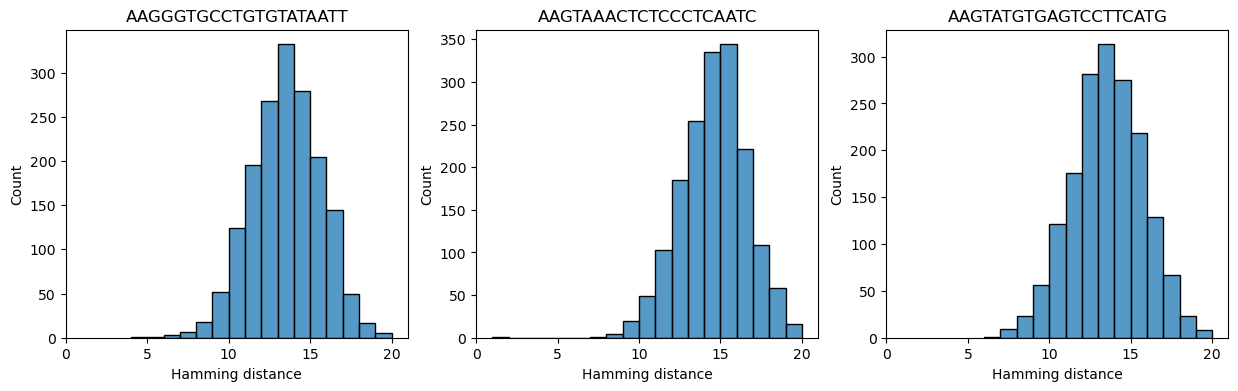

In [22]:
barcode_index = [13, 14, 15]
hamming_distances = []
for idx in barcode_index:
    hds = [
        hamming_distance(unpaired[idx], i) if unpaired[idx] != i else 20
        for i in barcodes1.index
    ]
    hamming_distances.append(hds)
    print(unpaired[idx])
    for hd, bc in zip(hds, barcodes1.index):
        if hd == 1:
            print(bc, hd)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(hamming_distances[0], ax=ax1, binwidth=1)
sns.histplot(hamming_distances[1], ax=ax2, binwidth=1)
sns.histplot(hamming_distances[2], ax=ax3, binwidth=1)
ax1.set_xlim((0, 21))
ax2.set_xlim((0, 21))
ax3.set_xlim((0, 21))
ax1.set_title(unpaired[barcode_index[0]])
ax2.set_title(unpaired[barcode_index[1]])
ax3.set_title(unpaired[barcode_index[2]])
ax1.set_xlabel("Hamming distance")
ax2.set_xlabel("Hamming distance")
ax3.set_xlabel("Hamming distance")
plt.show()

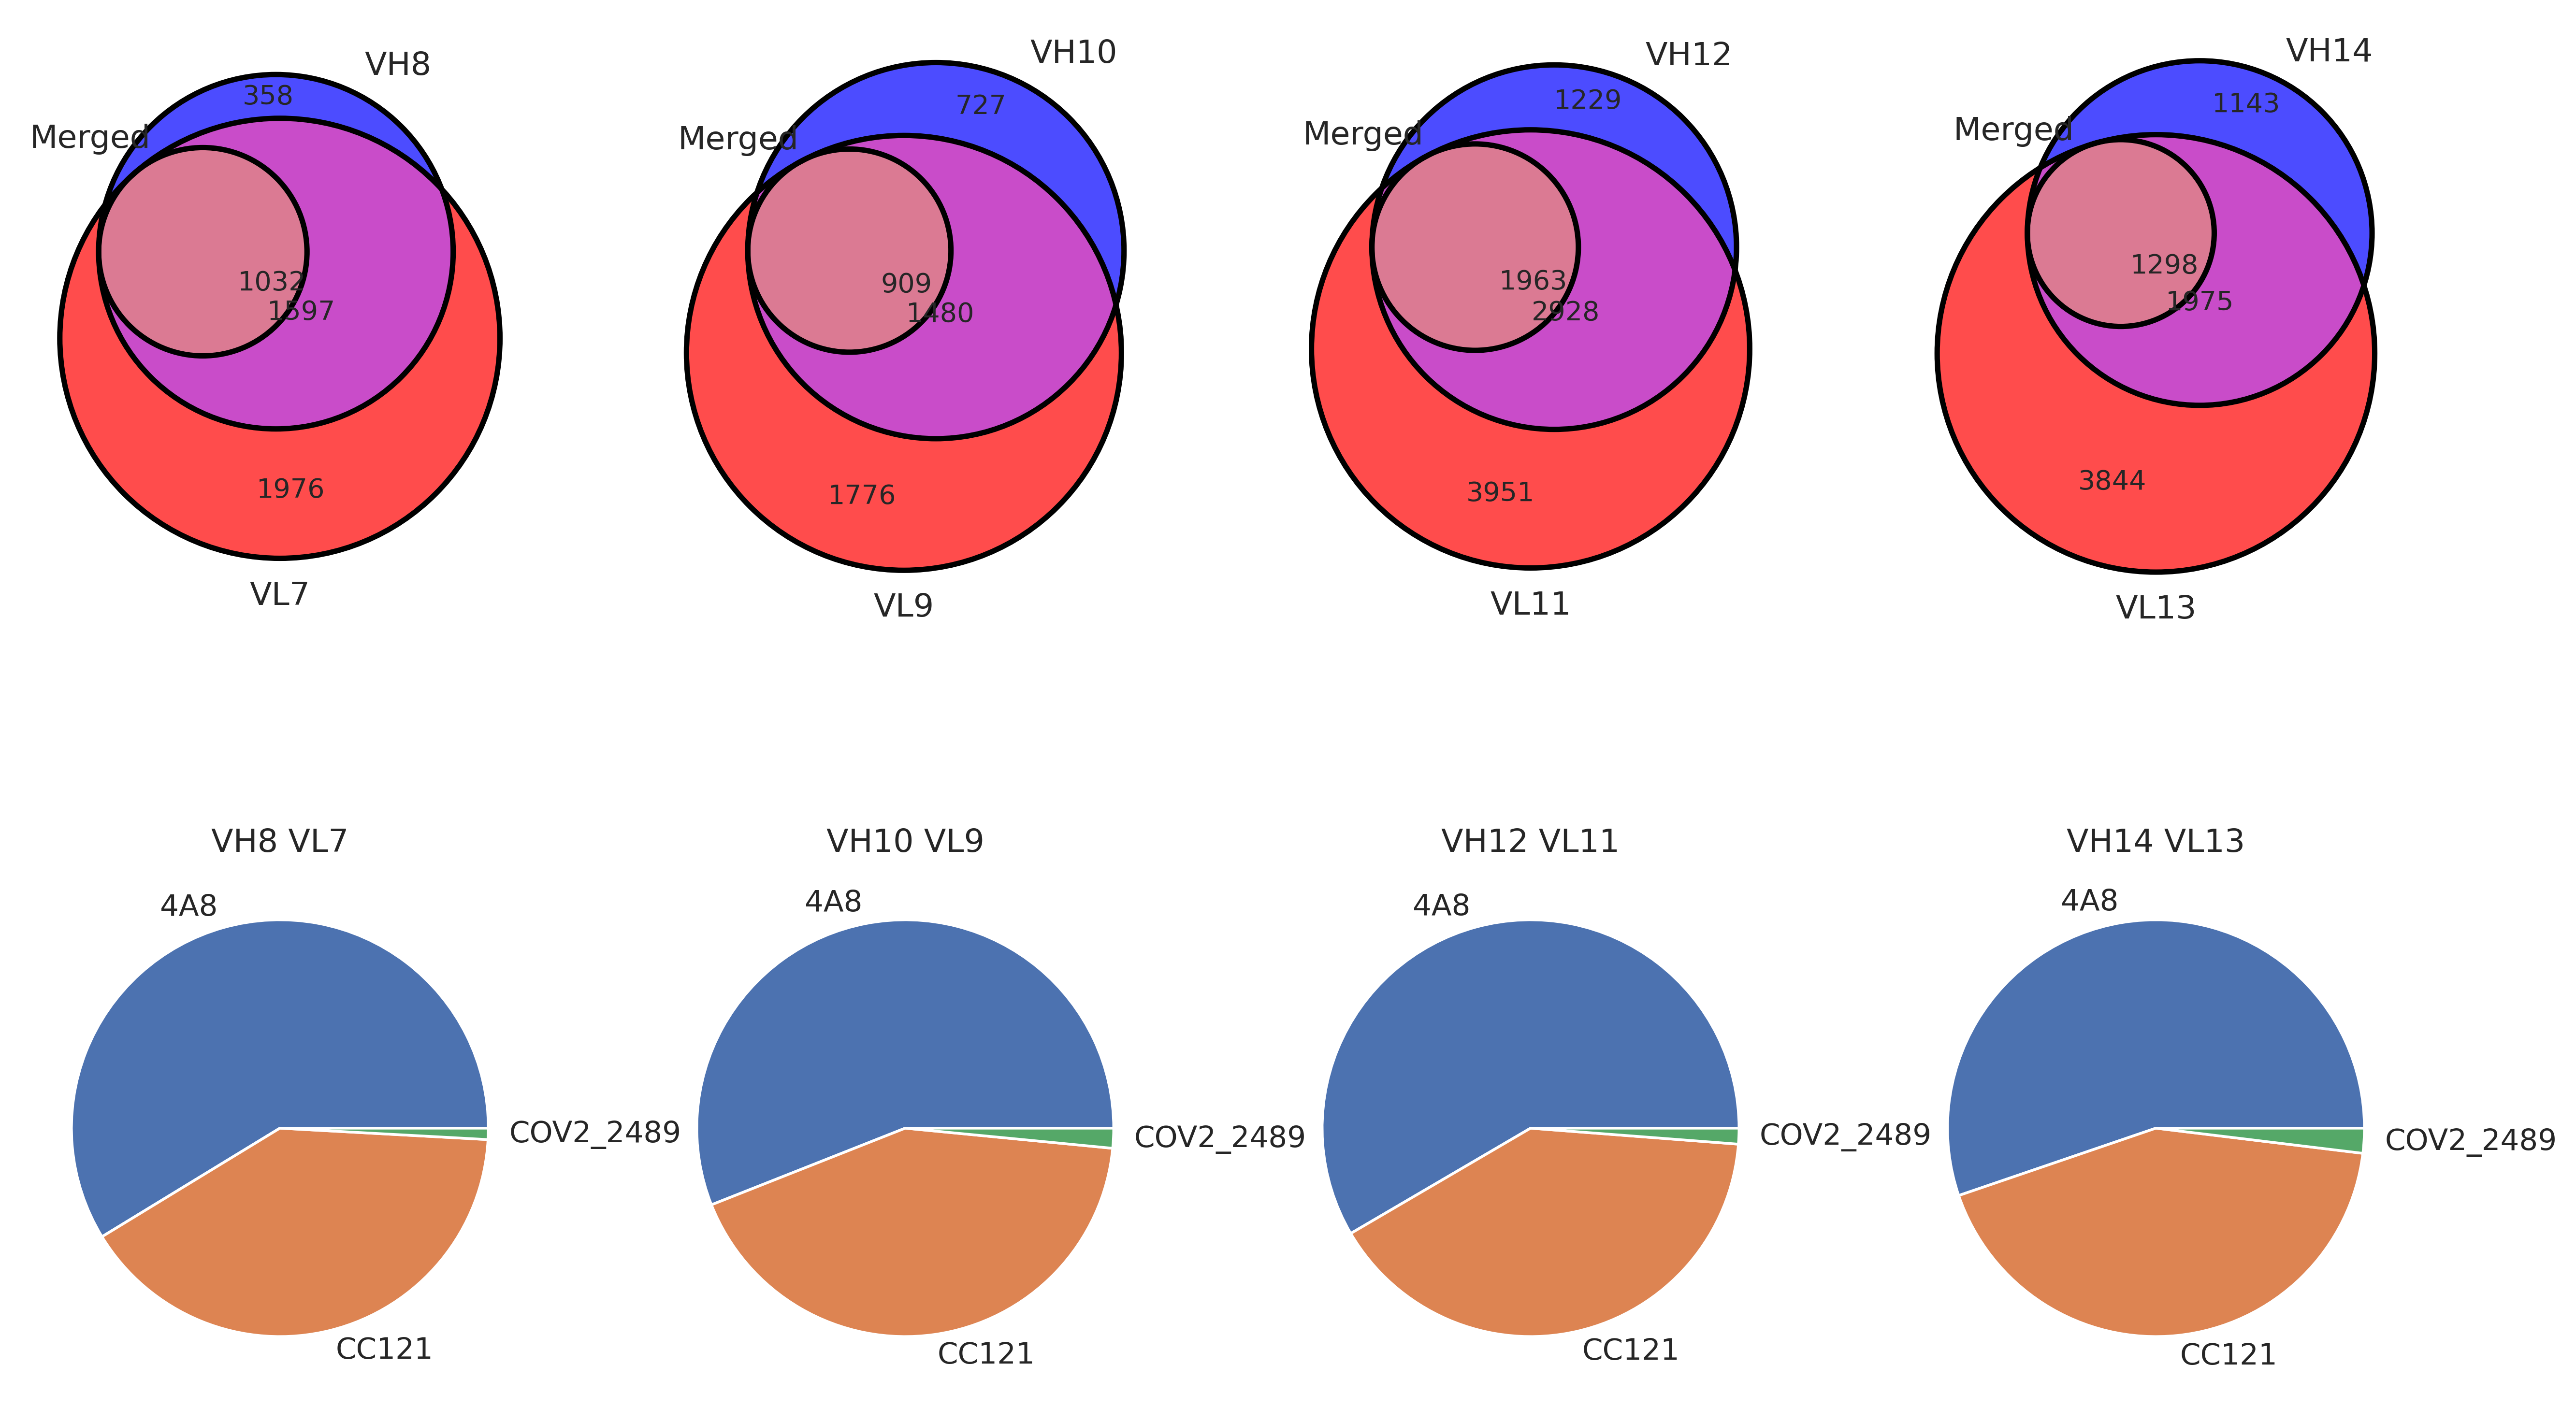

In [2]:
samples = [7, 9, 11, 13]
num_samples = len(samples)
for i, s in enumerate(samples):
    df_merged = pd.read_csv(
        "/projects/brpe7306/fab-library-barcoding/maps/VH"
        + str(s + 1)
        + "_VL"
        + str(s)
        + "_vhvl.csv"
    )
    df_VH = pd.read_csv(
        "/projects/brpe7306/fab-library-barcoding/maps/VH"
        + str(s + 1)
        + "/map_success.csv"
    )
    df_VL = pd.read_csv(
        "/projects/brpe7306/fab-library-barcoding/maps/VL" + str(s) + "/map_success.csv"
    )
    merge = len(df_merged)
    VH = len(df_VH["Barcode"])
    VL = len(df_VL["Barcode"])
    VH_merge, VL_merge, vhvl = 0, 0, 0
    for bc in df_merged["Barcode"].to_list():
        if bc in df_VH["Barcode"].to_list():
            VH_merge += 1
        if bc in df_VL["Barcode"].to_list():
            VL_merge += 1
    for bc in df_VH["Barcode"].to_list():
        if bc in df_VL["Barcode"].to_list():
            vhvl += 1
    #     print("Merged bcs:", merge)
    #     print("VH bcs:", VH)
    #     print("VL bcs:", VL)
    #     print("Merge_VH", VH_merge)
    #     print("Merge_VL", VL_merge)
    #     print("VH_VL", vhvl)

    custom_params = {
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.dpi": 400,
        "savefig.dpi": 600,
        "figure.figsize": (16, 10),
        "font.size": 10,
    }
    sns.set(rc=custom_params, style="ticks")

    subsets = (0, VH - vhvl, 0, VL - vhvl, 0, vhvl, merge)
    plt.subplot(2, num_samples, i + 1)
    venn3(
        subsets=subsets,
        set_labels=("Merged", "VH" + str(s + 1), "VL" + str(s)),
        set_colors=("orange", "blue", "red"),
        alpha=0.7,
    )
    venn3_circles(subsets=subsets, linewidth=2)

    labels = list(df_merged["Gene_H"].value_counts().index)
    sizes = df_merged["Gene_H"].value_counts()
    plt.subplot(2, num_samples, i + 5)
    plt.pie(sizes, labels=labels)
    plt.title("VH" + str(s + 1) + " VL" + str(s))

plt.show()

[Q120K, S7T]                                                              36
[S7T]                                                                     30
[WT]                                                                      30
[Q120K]                                                                   25
[F58Y, L104M, V3Q, M4L, E107D]                                            22
[Q120K, T94M]                                                             22
[L27F, F58Y, L104M, V3Q, M4L, E107D]                                      20
[L27F, L104M, V3Q, M4L, E107D]                                            18
[L27F, F58Y, L104M, V3Q, M4L]                                             17
[L27F, F58Y, L104M, V3Q, E107D]                                           16
[F58Y, L104M, V3Q, M4L]                                                   16
[S7T, T94M]                                                               16
[L104M, V3Q, M4L]                                                         15

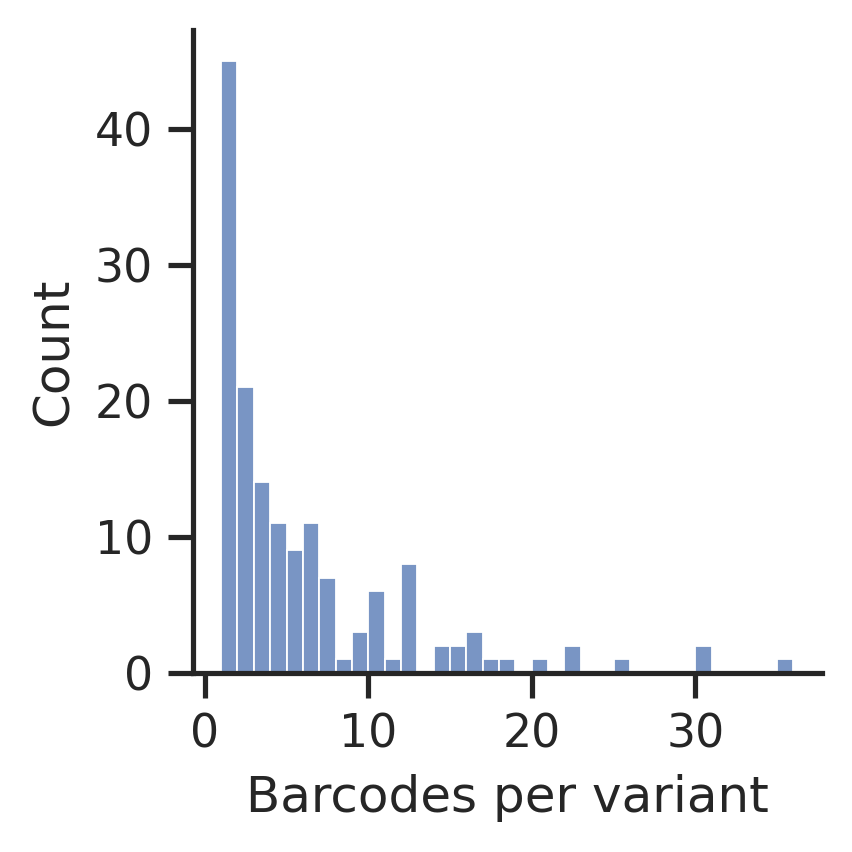

In [47]:
def get_gene(input_str):
    gene = input_str.split(">")[0]
    return gene

def extract_mutations_from_str(input_str):
    mut_list = input_str.split("|")
    mut_list = [mut.split(":")[1] for mut in mut_list]
    mut_list = [mut.split(";") for mut in mut_list]
    mut_list = mut_list[0] + mut_list[1]
    mut_list = [mut.split("-")[0] for mut in mut_list]
    mut_list = [mut for mut in mut_list if mut != "WT"]
    if mut_list == []:
        return ["WT"]
    return mut_list

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.dpi": 300,
    "savefig.dpi": 600,
    "figure.figsize": (3, 3),
}

sns.set(rc=custom_params, style="ticks", font_scale=1)


df_lib = pd.read_csv("/projects/brpe7306/fab-library-barcoding/maps_final/VH2VL1_final.csv")
df_lib["Ab"] = df_lib["Variant"].apply(get_gene)
df_lib['Variant'] = df_lib['Variant'].apply(extract_mutations_from_str)
counts = df_lib['Variant'].value_counts()
print(counts.to_string())
sns.histplot(counts, binwidth=1)
plt.xlabel("Barcodes per variant")
plt.tight_layout()
plt.savefig("bcs_per_var.png")
plt.show()
